In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import tensorflow as tf
from keras import models
from keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [12]:
df = pd.read_csv("/content/gdrive/MyDrive/pet-transformator/base_pred_to_clf_trans.csv")
X = df.drop("label", axis = 1).copy()
y = df["label"].replace([1, 2, 3, 4], [0, 1, 2, 3])
x_tr, x_test, y_tr, y_test = train_test_split(X, y, test_size = 0.15, random_state = 1, stratify = y)
x_train, x_val, y_train, y_val = train_test_split(x_tr, y_tr, test_size = 0.2, random_state = 1, stratify = y_tr)
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
x_train = x_train.values
x_val = x_val.values
print(df.shape)
print(x_train.shape)
print(x_val.shape)
print(y_val)
print(y_test)

(2100, 53)
(1428, 52)
(357, 52)
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]
1958    0
1026    0
1911    0
1204    2
1115    2
       ..
524     0
1964    0
874     0
92      2
170     0
Name: label, Length: 315, dtype: int64


# **Базовое решение**

## **1 слой (40, relu)**

In [4]:
model = models.Sequential()
model.add(layers.Dense(40, activation='relu', input_shape=(52,)))
model.add(layers.Dense(4, activation='softmax'))

In [5]:
optimizer = optimizers.Adam(learning_rate=0.001)

In [6]:
model.compile(optimizer=optimizer,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

--- 681.963788986206 seconds ---
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       256
           1       1.00      1.00      1.00        13
           2       0.94      0.88      0.91        17
           3       0.93      0.93      0.93        29

    accuracy                           0.98       315
   macro avg       0.97      0.95      0.96       315
weighted avg       0.98      0.98      0.98       315

[[255   0   1   0]
 [  0  13   0   0]
 [  0   0  15   2]
 [  2   0   0  27]]


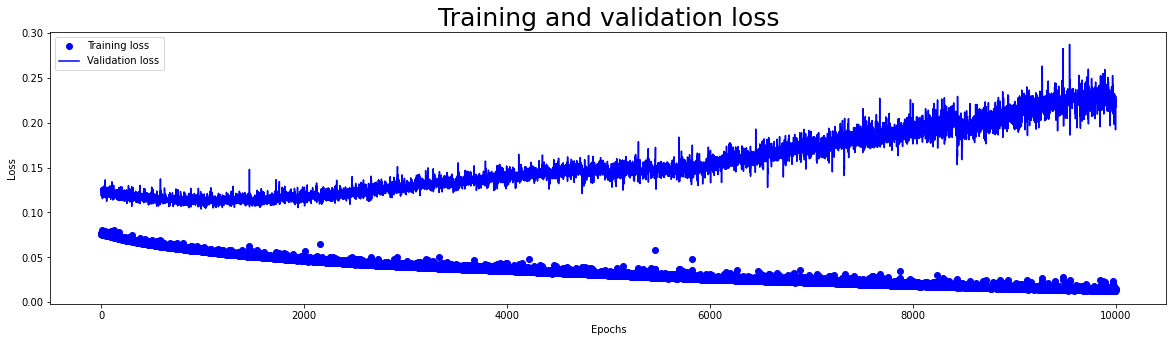

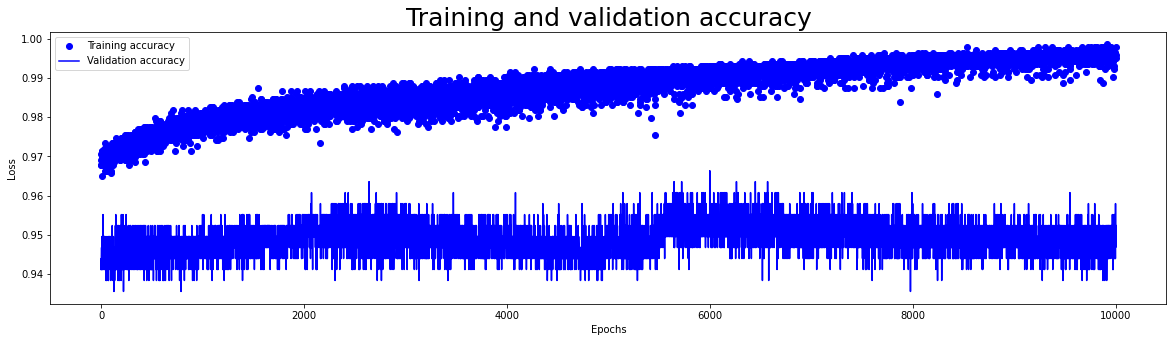

In [11]:
import time
start_time = time.time()

history = model.fit(x_train,
                    y_train,
                    verbose=0,
                    epochs=10000,
                    batch_size=128,
                    validation_data=(x_val, y_val))

print("--- %s seconds ---" % (time.time() - start_time))

print(classification_report(y_test,tf.argmax(input=model.predict(x_test), axis=1)))
print(confusion_matrix(y_test,tf.argmax(input=model.predict(x_test), axis=1)))

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(loss) +1)
plt.figure(figsize=(20,5))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss', fontsize = 25)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

epochs = range(1, len(acc) +1)
plt.figure(figsize=(20,5))
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy', fontsize = 25)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
model.save('/content/gdrive/MyDrive/pet-transformator/Keras/1.1.Dense_(40,relu,0.001)_acc_0.9841.h5')

In [18]:
round(accuracy_score(y_test,tf.argmax(input=model.predict(x_test), axis=1)),4)

0.9841

### **Обучение на нескольких learning_rate**

#########################
#########################
Learning_rate: 0.0001
--- 562.623044013977 seconds ---
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       256
           1       1.00      1.00      1.00        13
           2       1.00      0.94      0.97        17
           3       0.93      0.93      0.93        29

    accuracy                           0.99       315
   macro avg       0.98      0.97      0.97       315
weighted avg       0.99      0.99      0.99       315

[[255   0   0   1]
 [  0  13   0   0]
 [  0   0  16   1]
 [  2   0   0  27]]
Accuracy: 0.9873
#########################
#########################
Learning_rate: 0.003
--- 562.574126958847 seconds ---
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       256
           1       1.00      1.00      1.00        13
           2       0.88      0.88      0.88        17
           3       0.90      0.90      0.

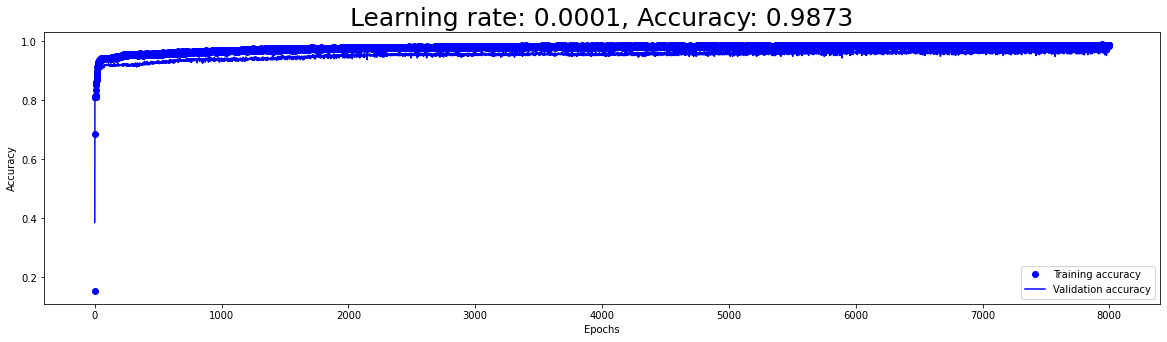

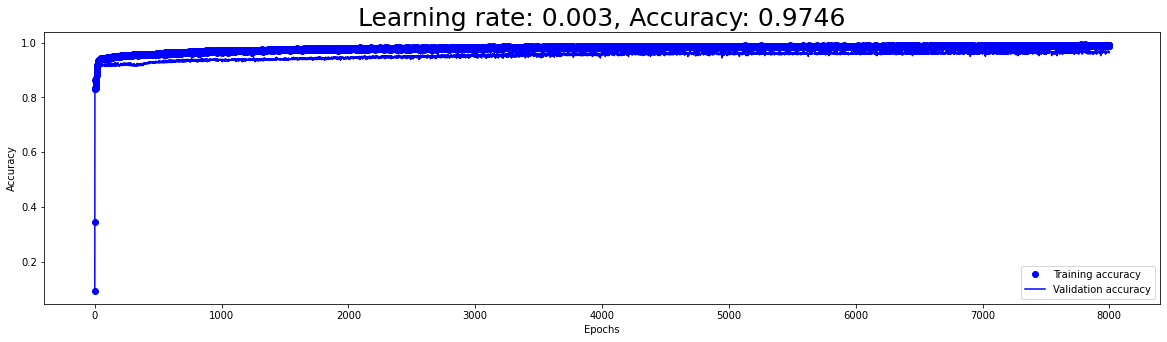

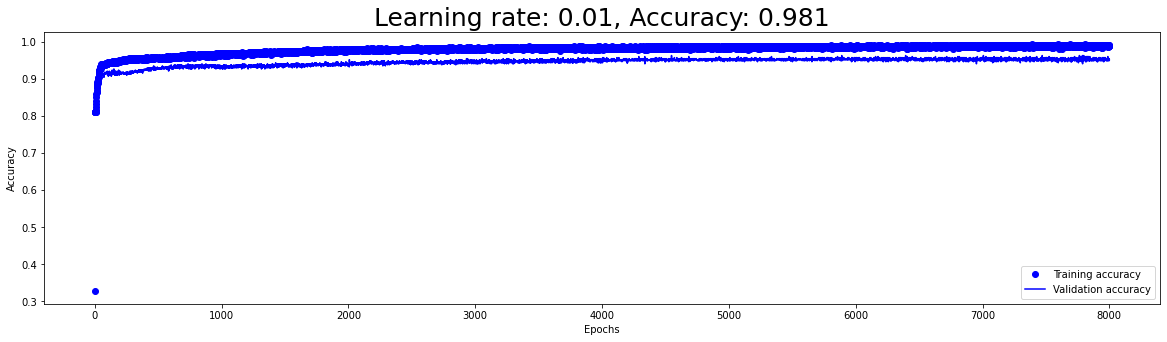

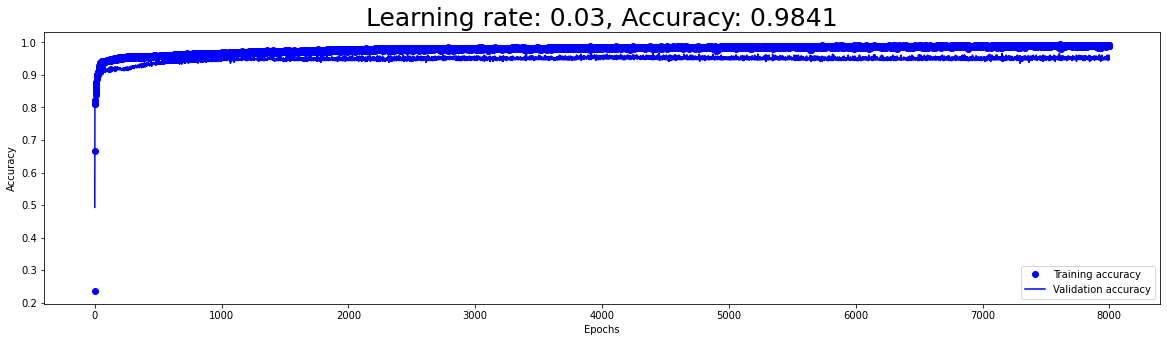

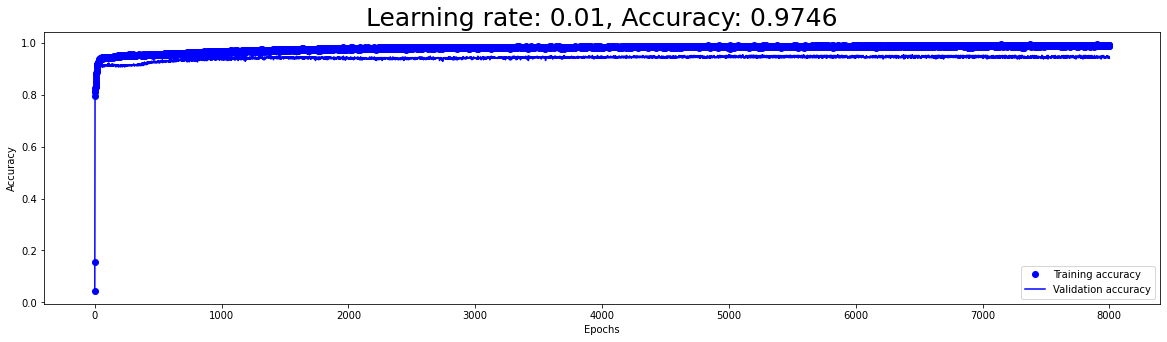

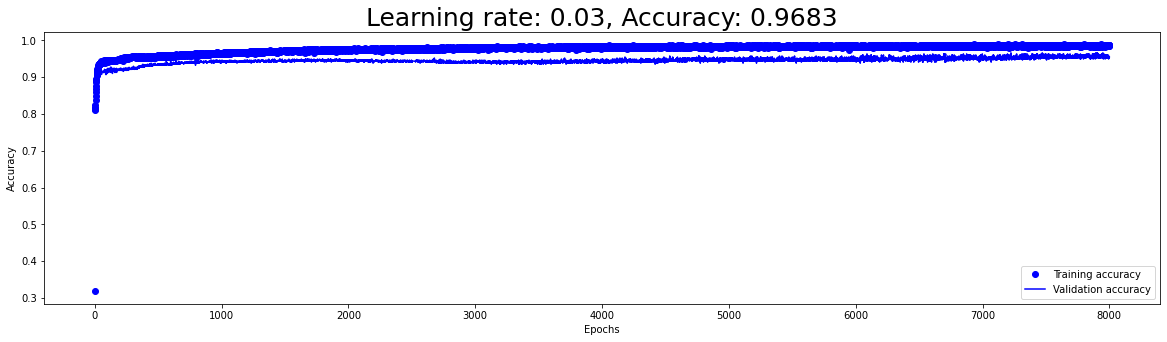

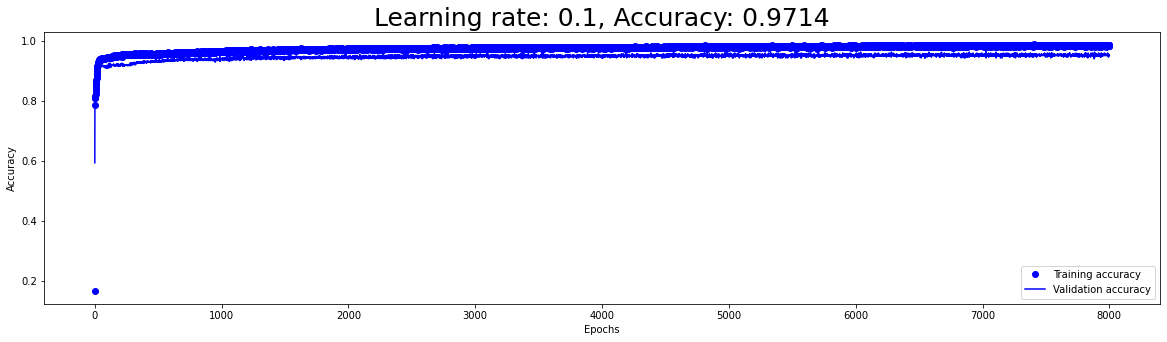

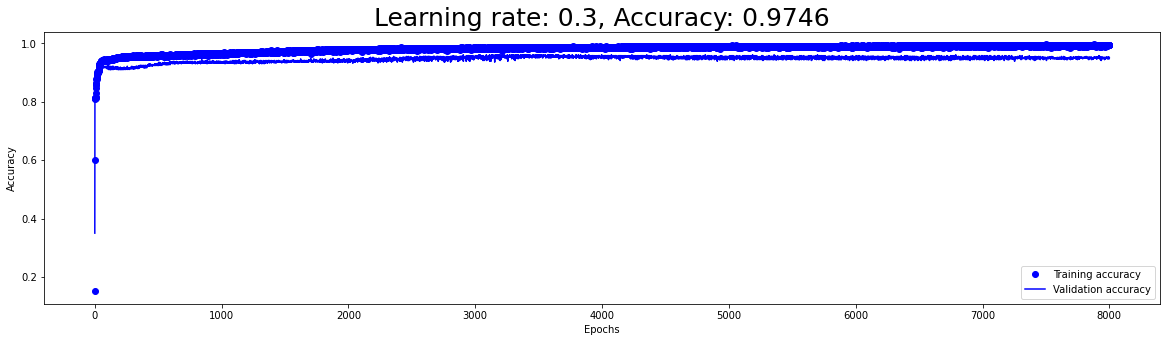

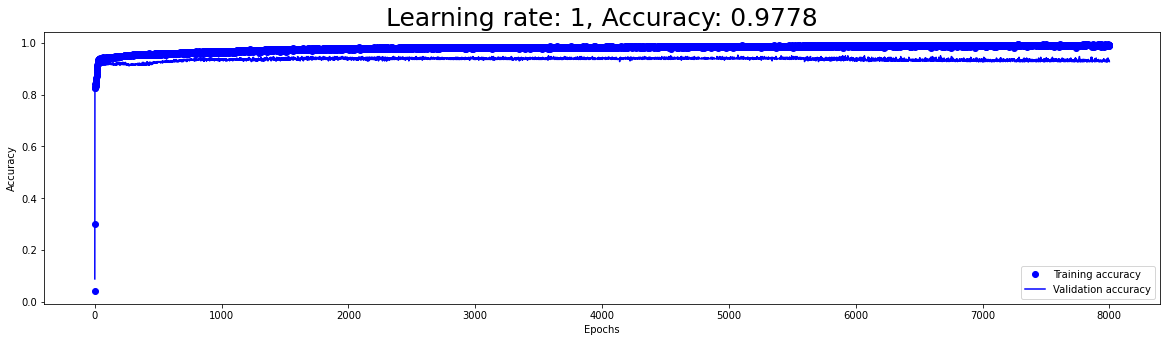

In [28]:
i = 2
for lr in [0.0001, 0.003, 0.01, 0.03, 0.01, 0.03, 0.1, 0.3, 1]:
#for lr in [0.0001, 0.003]:
    model = models.Sequential()
    model.add(layers.Dense(40, activation='relu', input_shape=(52,)))
    model.add(layers.Dense(4, activation='softmax'))
    optimizer = optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer,
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

    import time
    start_time = time.time()

    history = model.fit(x_train,
                        y_train,
                        verbose=0,
                        epochs=8000,
                        batch_size=128,
                        validation_data=(x_val, y_val))
    
    accuracy = round(accuracy_score(y_test,tf.argmax(input=model.predict(x_test), axis=1)),4)
    print('#########################')
    print('#########################')
    print(f'Learning_rate: {lr}')
    print("--- %s seconds ---" % (time.time() - start_time))

    print(classification_report(y_test,tf.argmax(input=model.predict(x_test), axis=1)))
    print(confusion_matrix(y_test,tf.argmax(input=model.predict(x_test), axis=1)))
    print(f'Accuracy: {accuracy}')

    model.save(f'/content/gdrive/MyDrive/pet-transformator/Keras/1.{i}.Dense_(40,relu,{lr})_acc_{accuracy}.h5')
    i += 1

    loss = history.history['loss']
    val_loss = history.history['val_loss']
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    epochs = range(1, len(acc) +1)
    plt.figure(figsize=(20,5))
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title(f'Learning rate: {lr}, Accuracy: {accuracy}', fontsize = 25)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

### **Тест диапазона learning_rate (для сравнения)**

In [92]:
!cp /content/gdrive/MyDrive/pet-transformator/Keras/keras_lr_finder/lr_finder.py /content

In [96]:
from lr_finder import LRFinder

Epoch 1/10
23/23 [==============================] - 0s 6ms/step - loss: 1.8533 - accuracy: 0.0539
Epoch 2/10
23/23 [==============================] - 0s 5ms/step - loss: 1.1736 - accuracy: 0.3368
Epoch 3/10
23/23 [==============================] - 0s 5ms/step - loss: 0.6476 - accuracy: 0.8130
Epoch 4/10
23/23 [==============================] - 0s 5ms/step - loss: 0.4778 - accuracy: 0.8116
Epoch 5/10
23/23 [==============================] - 0s 5ms/step - loss: 0.4275 - accuracy: 0.8116
Epoch 6/10
23/23 [==============================] - 0s 5ms/step - loss: 0.4046 - accuracy: 0.8116
Epoch 7/10
23/23 [==============================] - 0s 5ms/step - loss: 0.3785 - accuracy: 0.8151
Epoch 8/10
23/23 [==============================] - 0s 5ms/step - loss: 0.3409 - accuracy: 0.8431
Epoch 9/10
23/23 [==============================] - 0s 5ms/step - loss: 0.3042 - accuracy: 0.8789
Epoch 10/10
23/23 [==============================] - 0s 5ms/step - loss: 0.4013 - accuracy: 0.8725
Epoch 1/10
23/23 [=

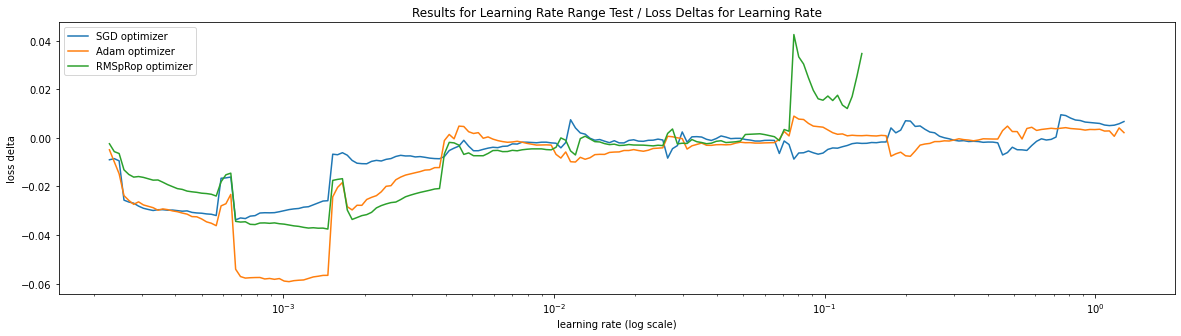

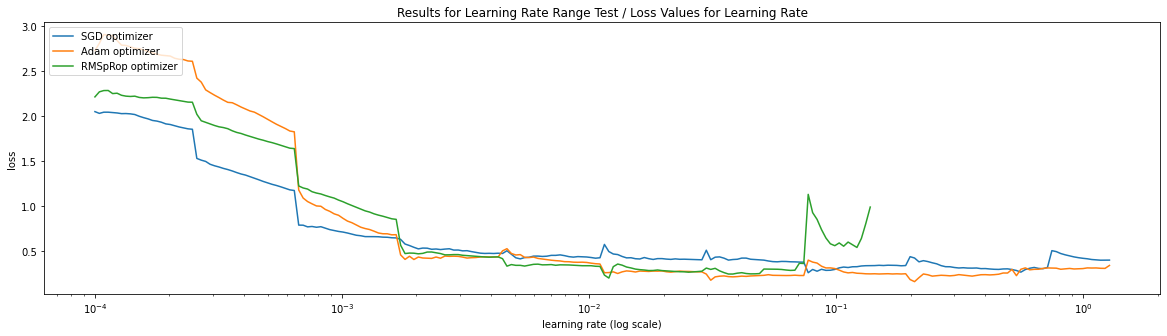

In [80]:
tests = [
  (optimizers.SGD(), 'SGD optimizer'),
  (optimizers.Adam(), 'Adam optimizer'),
  (optimizers.RMSprop(), 'RMSpRop optimizer')
]

test_learning_rates = []
test_losses = []
test_loss_changes = []
labels = []


for test_optimizer, label in tests:

    model = models.Sequential()
    model.add(layers.Dense(40, activation='relu', input_shape=(52,)))
    model.add(layers.Dense(4, activation='softmax'))
    model.compile(optimizer=test_optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    lr_finder = LRFinder(model)

    outputs = lr_finder.find(x_train, 
                         y_train, 
                         start_lr=0.0001, 
                         end_lr=1, 
                         batch_size=64, 
                         epochs=10)
    
    learning_rates = lr_finder.lrs
    losses = lr_finder.losses
    loss_changes = []

    moving_average = 20

    for i in range(moving_average, len(learning_rates)):
        loss_changes.append((losses[i] - losses[i - moving_average]) / moving_average)

    test_learning_rates.append(learning_rates)
    test_losses.append(losses)
    test_loss_changes.append(loss_changes)
    labels.append(label)

plt.figure(figsize=(20,5))
for i in range(0, len(test_learning_rates)):
  plt.plot(test_learning_rates[i][moving_average:], test_loss_changes[i], label=labels[i])
plt.xscale('log')
plt.legend(loc='upper left')
plt.ylabel('loss delta')
plt.xlabel('learning rate (log scale)')
plt.title('Results for Learning Rate Range Test / Loss Deltas for Learning Rate')
plt.show()

# Generate plot for Loss Values
plt.figure(figsize=(20,5))
for i in range(0, len(test_learning_rates)):
  plt.plot(test_learning_rates[i], test_losses[i], label=labels[i])
plt.xscale('log')
plt.legend(loc='upper left')
plt.ylabel('loss')
plt.xlabel('learning rate (log scale)')
plt.title('Results for Learning Rate Range Test / Loss Values for Learning Rate')
plt.show()

Epoch 1/100
23/23 [==============================] - 1s 6ms/step - loss: 2.7482 - accuracy: 0.0742
Epoch 2/100
23/23 [==============================] - 0s 5ms/step - loss: 2.5342 - accuracy: 0.0742
Epoch 3/100
23/23 [==============================] - 0s 5ms/step - loss: 2.3243 - accuracy: 0.0735
Epoch 4/100
23/23 [==============================] - 0s 5ms/step - loss: 2.1223 - accuracy: 0.0735
Epoch 5/100
23/23 [==============================] - 0s 5ms/step - loss: 1.9274 - accuracy: 0.0728
Epoch 6/100
23/23 [==============================] - 0s 5ms/step - loss: 1.7412 - accuracy: 0.0707
Epoch 7/100
23/23 [==============================] - 0s 5ms/step - loss: 1.5604 - accuracy: 0.0693
Epoch 8/100
23/23 [==============================] - 0s 5ms/step - loss: 1.3922 - accuracy: 0.2675
Epoch 9/100
23/23 [==============================] - 0s 5ms/step - loss: 1.2381 - accuracy: 0.6120
Epoch 10/100
23/23 [==============================] - 0s 5ms/step - loss: 1.1026 - accuracy: 0.6870
Epoch 11/

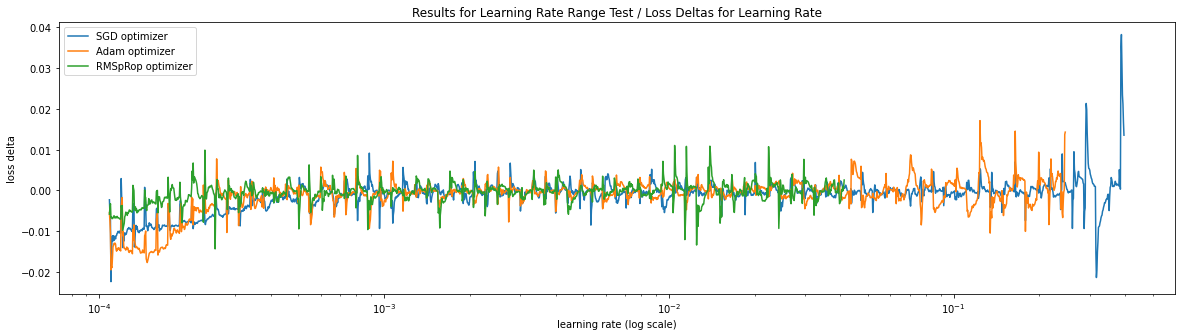

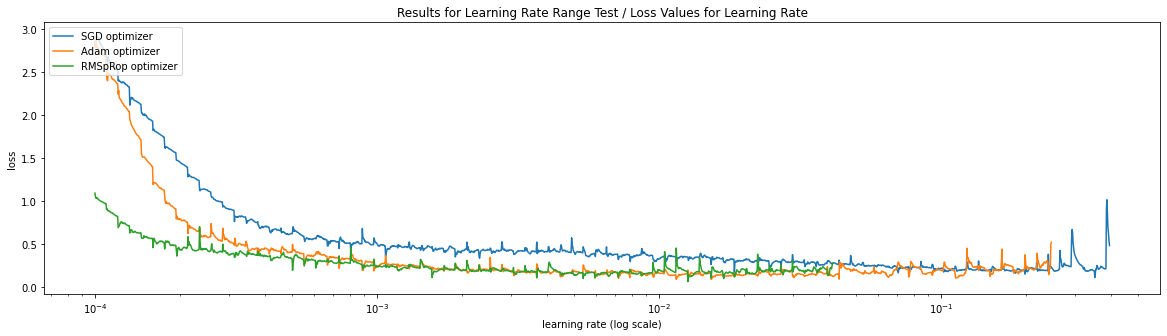

In [81]:
tests = [
  (optimizers.SGD(), 'SGD optimizer'),
  (optimizers.Adam(), 'Adam optimizer'),
  (optimizers.RMSprop(), 'RMSpRop optimizer')
]

test_learning_rates = []
test_losses = []
test_loss_changes = []
labels = []


for test_optimizer, label in tests:

    model = models.Sequential()
    model.add(layers.Dense(40, activation='relu', input_shape=(52,)))
    model.add(layers.Dense(4, activation='softmax'))
    model.compile(optimizer=test_optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    lr_finder = LRFinder(model)

    outputs = lr_finder.find(x_train, 
                         y_train, 
                         start_lr=0.0001, 
                         end_lr=1, 
                         batch_size=64, 
                         epochs=100)
    
    learning_rates = lr_finder.lrs
    losses = lr_finder.losses
    loss_changes = []

    moving_average = 20

    for i in range(moving_average, len(learning_rates)):
        loss_changes.append((losses[i] - losses[i - moving_average]) / moving_average)

    test_learning_rates.append(learning_rates)
    test_losses.append(losses)
    test_loss_changes.append(loss_changes)
    labels.append(label)

plt.figure(figsize=(20,5))
for i in range(0, len(test_learning_rates)):
  plt.plot(test_learning_rates[i][moving_average:], test_loss_changes[i], label=labels[i])
plt.xscale('log')
plt.legend(loc='upper left')
plt.ylabel('loss delta')
plt.xlabel('learning rate (log scale)')
plt.title('Results for Learning Rate Range Test / Loss Deltas for Learning Rate')
plt.show()

# Generate plot for Loss Values
plt.figure(figsize=(20,5))
for i in range(0, len(test_learning_rates)):
  plt.plot(test_learning_rates[i], test_losses[i], label=labels[i])
plt.xscale('log')
plt.legend(loc='upper left')
plt.ylabel('loss')
plt.xlabel('learning rate (log scale)')
plt.title('Results for Learning Rate Range Test / Loss Values for Learning Rate')
plt.show()

## **Выводы (40, relu)**

Обучили архитектуру на разных скоростях обучения как методом перебора, так и тестом диапазона скорости обучения.

В обоих случаях лучшие результаты увидели на скоростях 

0,001 (0.98 точность на тестовой выборке) 
0,0001 (0.9873 точность на тестовой выборке) 
